In [1]:
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

from agents import *
from tqdm.auto import tqdm
from environments import RaceTrack
from IPython.display import Image
from multiproc_utils import TrainPool

In [2]:
track = RaceTrack(RaceTrack.track_challenge)
track.set_eval()

#n = 5
alpha = 0.5
epsilon = 0.1
final_alpha = 0.0
final_epsilon = 0.0
selector = EpsilonGreedy(epsilon=epsilon)

alpha_schedule = SigmoidSchedule(
    ["learner", "alpha"],
    alpha,
    0.0,
)
epsilon_schedule = LinearSchedule(
    ["selector", "epsilon"],
    epsilon,
    final_epsilon,
)

In [3]:
tb1 = NStepTreeBackup(n=1, alpha=alpha)
tb2 = NStepTreeBackup(n=2, alpha=alpha)
tb3 = NStepTreeBackup(n=3, alpha=alpha)
tb5 = NStepTreeBackup(n=5, alpha=alpha)

agents = Agent.combinations(
    num_states=track.num_states,
    num_actions=track.num_actions,
    selectors=[selector],
    learners=[tb1, tb2, tb3, tb5],
    scheduless=[[alpha_schedule, epsilon_schedule]],
    planners=[None],
)

In [4]:
num_episodes = 10_000
num_runs = 20

pool = TrainPool(agents, track, quiet=True)
agents = pool.train_average(num_episodes, num_runs)

Training Runs:   0%|          | 0/20 [00:00<?, ?it/s]

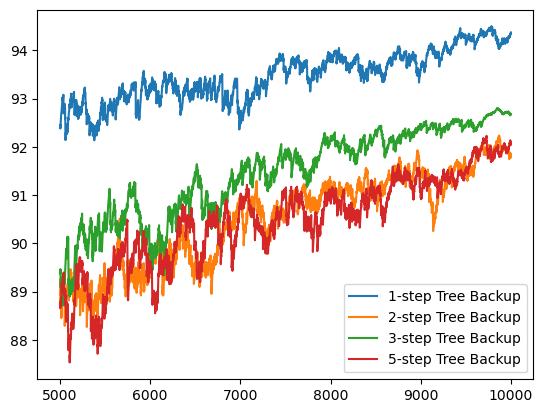

In [14]:
trail_length = 70
start_from = 5000

for agent, name in zip(agents, ["1-step Tree Backup", "2-step Tree Backup", "3-step Tree Backup", "5-step Tree Backup"]):
    xs, ys = agent.smoothed_ep_returns(trail_length)
    plt.plot(xs[start_from:], ys[start_from:], label=name)
    
plt.legend()
plt.show()